In [95]:
import pandas as pd
from pathlib import Path
from dateutil import parser
import datetime as dt
import plotly.graph_objects as go
from plotting import CandlePlot
from enum import Enum

In [17]:
df_h1 = pd.read_pickle(f"../data/candles/EUR_USD_H1.pkl")
df_m5 = pd.read_pickle(f"../data/candles/EUR_USD_M5.pkl")

In [16]:
df_plot = df_h1.iloc[:750]
df_plot.head()
# 2018-02-14 05:00:00+00:00


,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
0,2018-01-02 00:00:00+00:00,804,1.20105,1.20178,1.20090,1.20162,1.20097,1.20171,1.20082,1.20155,1.20113,1.20186,1.20099,1.20170
1,2018-01-02 01:00:00+00:00,1208,1.20168,1.20236,1.20143,1.20156,1.20161,1.20228,1.20135,1.20149,1.20175,1.20244,1.20151,1.20163
2,2018-01-02 02:00:00+00:00,766,1.20160,1.20166,1.20079,1.20096,1.20153,1.20158,1.20072,1.20089,1.20167,1.20173,1.20086,1.20102
3,2018-01-02 03:00:00+00:00,683,1.20100,1.20212,1.20095,1.20120,1.20093,1.20205,1.20088,1.20113,1.20108,1.20220,1.20102,1.20128
4,2018-01-02 04:00:00+00:00,497,1.20126,1.20196,1.20116,1.20175,1.20118,1.20188,1.20109,1.20168,1.20133,1.20204,1.20123,1.20182


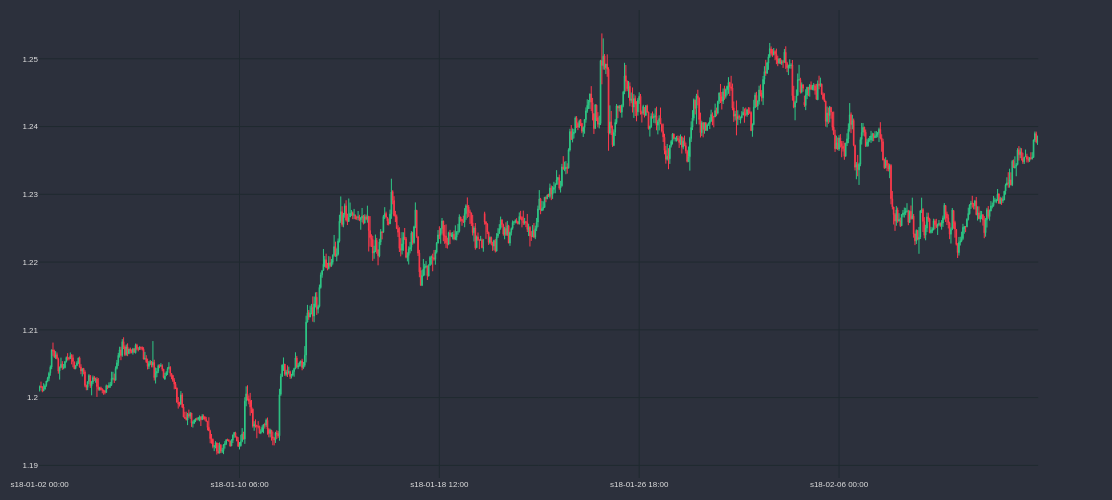

In [152]:
df_plot = df_h1.iloc[:750]
cp = CandlePlot(df_plot, candles=True)
cp.show_plot(width=1100, height=500)

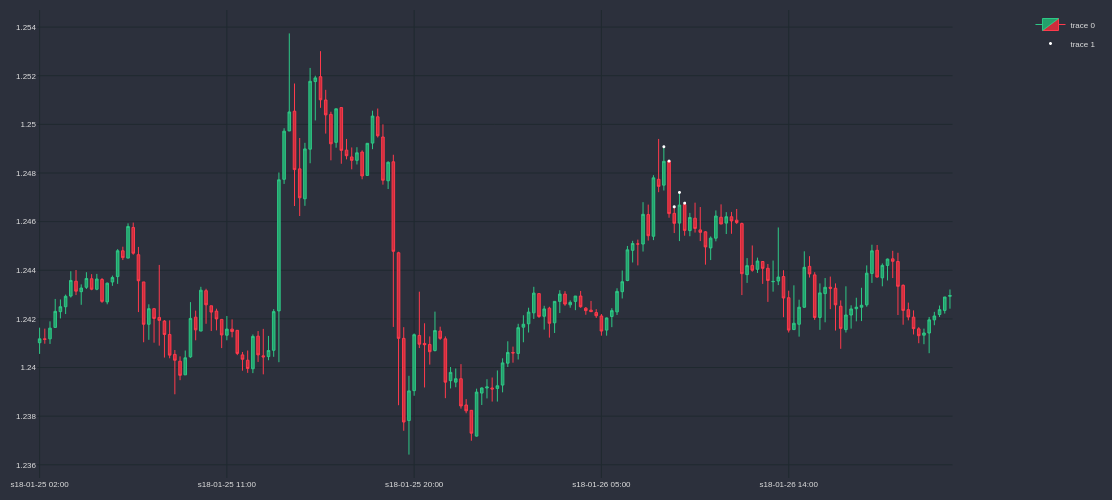

In [151]:

candle = df_h1[df_h1.time == parser.parse('2018-01-26T08:00:00Z')]
show_candle_on_diff_tf(candle, CandleTimeFrame.H1, 'EUR_USD')

In [150]:
def add_timestr(df: pd.DataFrame):
    df_copy = df.copy()
    df_copy['sTime'] = [dt.datetime.strftime(x, "s%y-%m-%d %H:%M") 
                        for x in df_copy.time]
    return df_copy

CandleTimeFrame = Enum('CandleTimeFrame', ['M5', 'M15', 'H1', 'H4'])
def show_candle_on_diff_tf(candle: pd.DataFrame, current_tf: CandleTimeFrame, pair: str, lower=True, number_of_candles=30):
    time_delta_dict = {
        CandleTimeFrame.M5.name: {'minutes': 5 * number_of_candles},
        CandleTimeFrame.M15.name: {'minutes': 15 * number_of_candles},
        CandleTimeFrame.H1.name: {'hours': 1 * number_of_candles},
        CandleTimeFrame.H4.name: {'hours': 4 * number_of_candles}
    }
    desired_tf = CandleTimeFrame(current_tf.value - 1) if lower else CandleTimeFrame(current_tf.value + 1)
    desired_df = pd.read_pickle(f"../data/candles/{pair}_{desired_tf.name}.pkl")
    candle_date = candle.iloc[0]['time']
    time_delta = dt.timedelta(**time_delta_dict[current_tf.name])
    graph_range_min = candle_date - time_delta
    graph_range_max = candle_date + time_delta
    candles_to_show = desired_df[(desired_df.time >= graph_range_min) & (desired_df.time <= graph_range_max)]
    candles_to_mark_range_min = candle_date
    candles_to_mark_range_max = candle_date + dt.timedelta(**{k:v/number_of_candles for k,v in time_delta_dict[current_tf.name].items()})
    candles_to_mark = candles_to_show[(candles_to_show.time >= candles_to_mark_range_min) & (candles_to_show.time <= candles_to_mark_range_max)]
    candles_to_mark_with_str_dates = add_timestr(candles_to_mark)
    cp = CandlePlot(candles_to_show, candles=True)
    
    cp.fig.add_trace(go.Scatter(
        x = candles_to_mark_with_str_dates.sTime,
        y = candles_to_mark_with_str_dates.mid_h,
        mode = 'markers',
        marker=dict(color='#FFFFFF', size=3)
    ))
    cp.show_plot(width=1100, height=500) 